## 1. Setup enviorment

In [1]:
from Preprocessing.time_series_preprocessing import get_dengue_dataset, get_municipality_name
from Preprocessing.time_series_preprocessing import preprocess_dataset_to_time_series

from Models.LSTM import create_model, train_model
import tensorflow as tf

from Utils.test_lstm import evaluate, plot_predictions, calculate_mean_std, evaluate_lstm_for_city

import pandas as pd
import os
import numpy as np

### Constants

In [2]:
""" Read Dataset:"""
embeddings_dir = 'Embeddings/'
embeddings = 'Embeddings/ResNet50V2_224_1024.csv'
labels = '../Tabular_data/Label_CSV_All_Municipality.csv'

Municipality='Medellín'

""" Dataset Preprocessing:"""
train_percentage = 80
T=3
autoregressive = True

""" Model Parameters:"""
lstm_layers=[1000, 500]
nn_layers=[250, 120, 3]
dense_acivation='relu'
recurrent_cells='LSTM'
bidirectional=False


## Create and Evaluate Model for a City

In [3]:
def run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=True, epochs=100, batch_size=16, n_tests=3, plot_samples=True, classification=None, fusion='late'):
    results = {}
    
    if type(embeddings) == list:
        for embedding in embeddings:
            results[embedding] = {}
            if type(Municipality) == list:
                for municipality in Municipality:
                    rmse, mape, smape = evaluate_lstm_for_city(labels, embedding, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification, fusion=fusion)
                    results[embedding][municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
            else:
                rmse, mape, smape = rmse, mape, smapeevaluate_lstm_for_city(labels, embedding, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification, fusion=fusion)
                results[embedding][Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    else:
        if type(Municipality) == list:
            for municipality in Municipality:
                rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification, fusion=fusion)
                results[municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
        else:
            rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, classification=classification, fusion=fusion)
            results[Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    
    return results

## Run Experiments

In [4]:
# Get list of embeddings:
def get_list_embeddings(embeddings_dir):
    embeddings_dir = 'Embeddings/'
    embeddings = []

    for embedding in os.listdir(embeddings_dir):
        embeddings.append(os.path.join(embeddings_dir, embedding))

    return embeddings

#embeddings = get_list_embeddings(embeddings_dir)


In [5]:
# Get list of municipalities:
Municipality = list(pd.unique(pd.read_csv('Embeddings/ResNet50V2_224_1024.csv')['Municipality Code']))

####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Cúcuta-----------------------------------------------
####################################################################################################
Obtaining dataframe for the city of 54001 - Cúcuta only...
The train shape is: (124, 2049)
The test shape is: (32, 2049)
The shape of the features is (121, 6147)
The shape of the labels is (121, 1)
The shape of the features is (29, 6147)
The shape of the labels is (29, 1)
The initial shapes are:
The train shape is (121, 6147)
The test shape is (29, 6147)
-----------------------
The Final sha

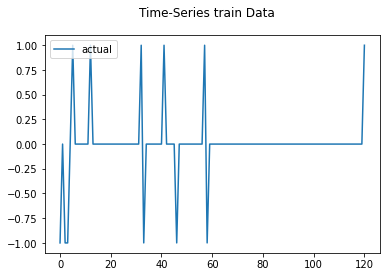

2023-02-23 16:25:09.113031: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-23 16:25:09.113076: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-23 16:25:09.113100: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9f7bdfccc75e): /proc/driver/nvidia/version does not exist
2023-02-23 16:25:09.113351: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-23 16:25:11.088980: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] 

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_input (InputLayer)         [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_2_input (InputLayer)       [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 3)            15

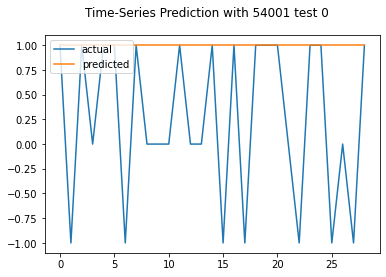

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00032: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_4_input (InputLayer)       [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_6_input (InputLayer)       [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 3)            

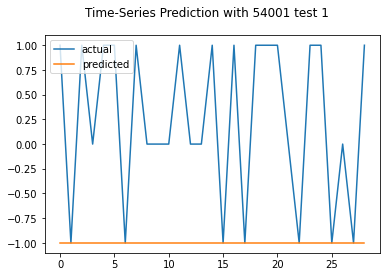

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_8_input (InputLayer)       [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_10_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 3)            

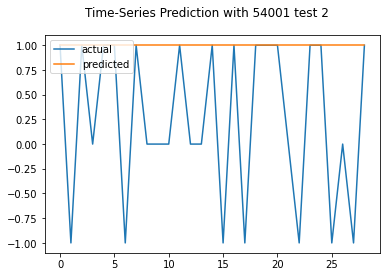

auc : average=0.543, std=0.118
acc : average=0.402, std=0.114
f1_score : average=0.072, std=0.205
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Neiva------------------------------------------------
##############################################################################################

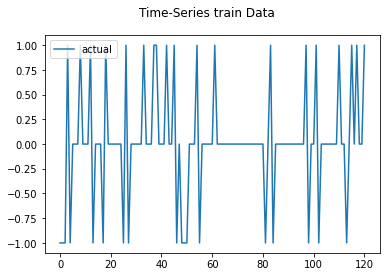

Restoring model weights from the end of the best epoch.
Epoch 00038: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00038: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00062: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00029: early stopping
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_12_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_14_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, 3)            

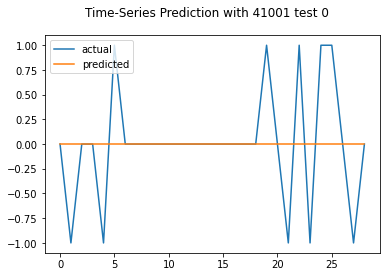

Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00050: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00056: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_16_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_18_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, 3)            

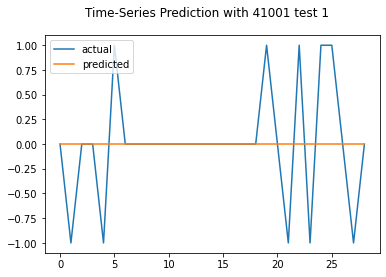

Restoring model weights from the end of the best epoch.
Epoch 00034: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00043: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00054: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_20_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_22_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_10 (Sequential)      (None, 3)            

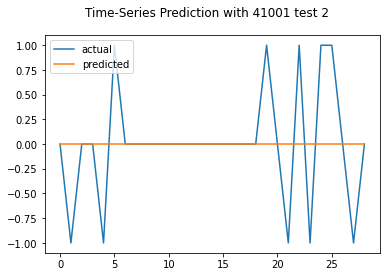

auc : average=0.741, std=0.006
acc : average=0.655, std=0.000
f1_score : average=0.264, std=0.373
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Medellín----------------------------------------------
##############################################################################################

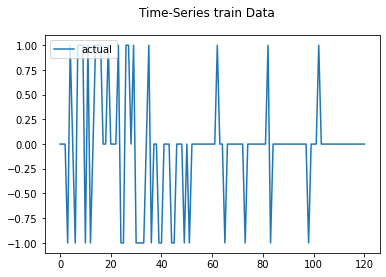

Restoring model weights from the end of the best epoch.
Epoch 00055: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00041: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00028: early stopping
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_24_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_26_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_12 (Sequential)      (None, 3)            15361213    lstm_24_input[0][0]              
______________________________________

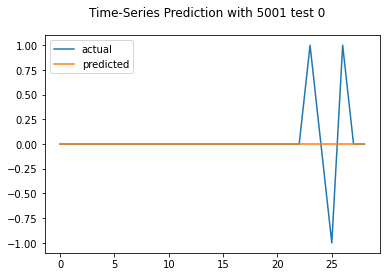

Restoring model weights from the end of the best epoch.
Epoch 00078: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00055: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_28_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_30_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_14 (Sequential)      (None, 3)            15361213    lstm_28_input[0][0]              
______________________________________

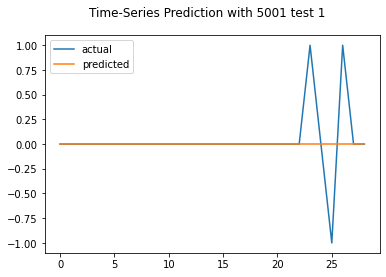

Restoring model weights from the end of the best epoch.
Epoch 00045: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00070: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00035: early stopping
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_32_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_34_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_16 (Sequential)      (None, 3)            15361213    lstm_32_input[0][0]              
______________________________________

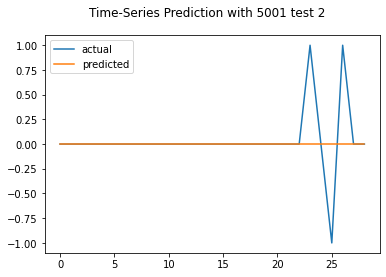

auc : average=0.940, std=0.018
acc : average=0.897, std=0.000
f1_score : average=0.315, std=0.446
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-------------------------------------------Villavicencio--------------------------------------------
##############################################################################################

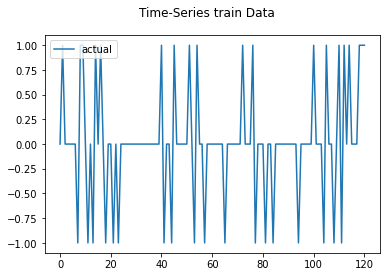

Restoring model weights from the end of the best epoch.
Epoch 00027: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_36_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_38_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_18 (Sequential)      (None, 3)            

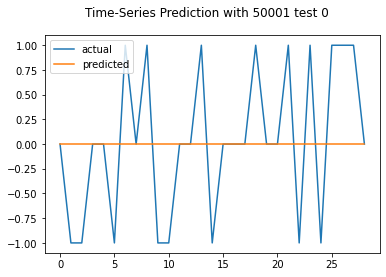

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00029: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_40_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_42_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_20 (Sequential)      (None, 3)           

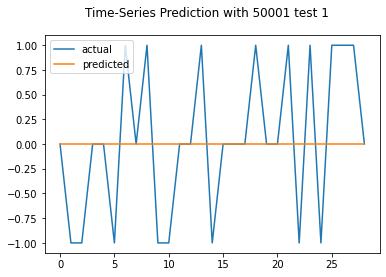

Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00032: early stopping
Evaluate: 
1/1 [==============================] - 0s 32ms/step - loss: 0.8944 - auc: 0.7845 - acc: 0.5862 - f1_score: 0.2222
loss: 0.8943719267845154
auc: 0.7844827771186829
acc: 0.5862069129943848
f1_score: [0.        0.6666667 0.       ]
{'loss': 0.8943719267845154, 'auc': 0.7844827771186829, 'acc': 0.5862069129943848, 'f1_score': array([0.       , 0.6666667, 0.       ], dtype=float32)}


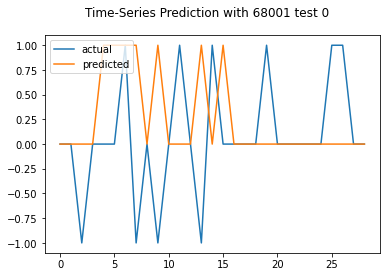

Restoring model weights from the end of the best epoch.
Epoch 00041: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00042: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00027: early stopping
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_52_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_54_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_26 (Sequential)      (None, 3)            15361213    lstm_52_input[0][0]              
_____________________________________

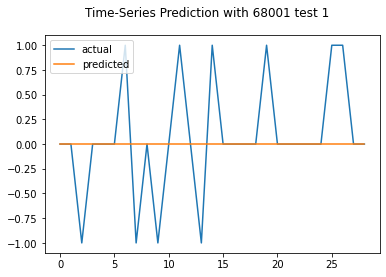

Restoring model weights from the end of the best epoch.
Epoch 00039: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00069: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00080: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping
Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_56_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_58_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_28 (Sequential)      (None, 3)           

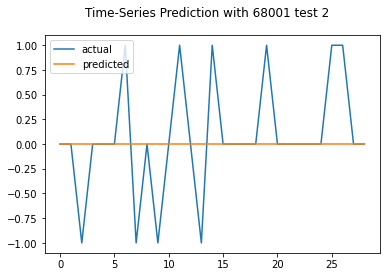

auc : average=0.782, std=0.032
acc : average=0.632, std=0.033
f1_score : average=0.250, std=0.355
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Barranquilla--------------------------------------------
##############################################################################################

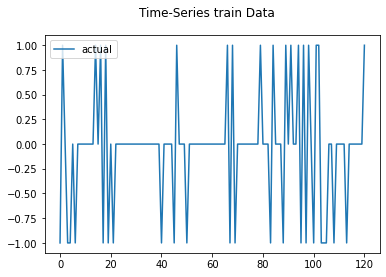

Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00038: early stopping
Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_60_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_62_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_30 (Sequential)      (None, 3)           

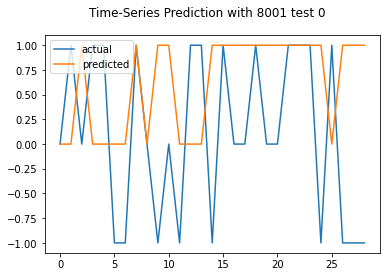

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_64_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_66_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_32 (Sequential)      (None, 3)           

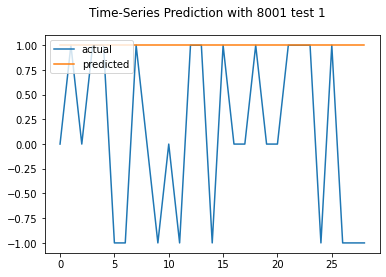

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_68_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_70_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_34 (Sequential)      (None, 3)           

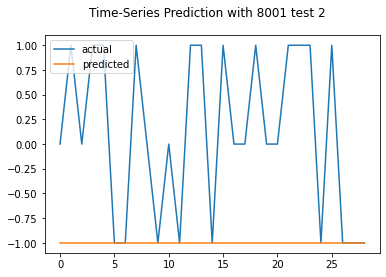

auc : average=0.520, std=0.026
acc : average=0.333, std=0.059
f1_score : average=0.000, std=0.000
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Montería----------------------------------------------
##############################################################################################

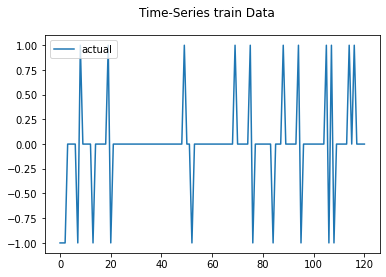

Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00030: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_72_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_74_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_36 (Sequential)      (None, 3)           

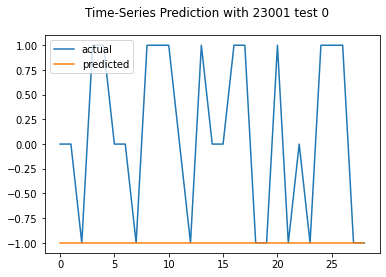

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_76_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_78_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_38 (Sequential)      (None, 3)           

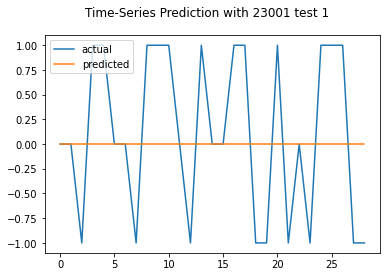

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_80_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_82_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_40 (Sequential)      (None, 3)           

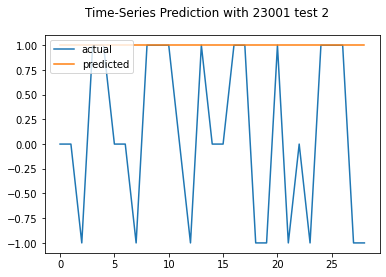

auc : average=0.485, std=0.035
acc : average=0.333, std=0.059
f1_score : average=0.000, std=0.000
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
------------------------------------------------Cali------------------------------------------------
##############################################################################################

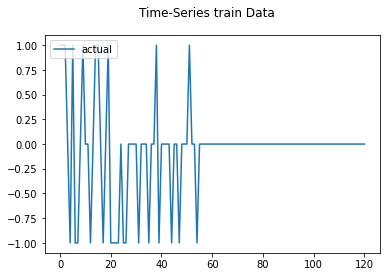

Restoring model weights from the end of the best epoch.
Epoch 00090: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00050: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_84_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_86_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_42 (Sequential)      (None, 3)            15361213    lstm_84_input[0][0]              
_____________________________________

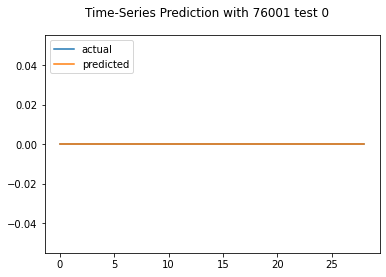

Restoring model weights from the end of the best epoch.
Epoch 00075: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00049: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00036: early stopping
Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_88_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_90_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_44 (Sequential)      (None, 3)            15361213    lstm_88_input[0][0]              
_____________________________________

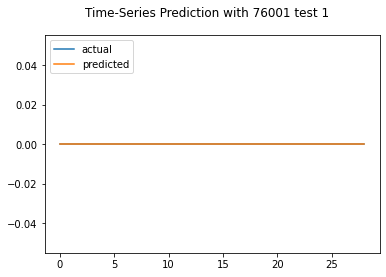

Restoring model weights from the end of the best epoch.
Epoch 00060: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00065: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_92_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_94_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_46 (Sequential)      (None, 3)            15361213    lstm_92_input[0][0]              
_____________________________________

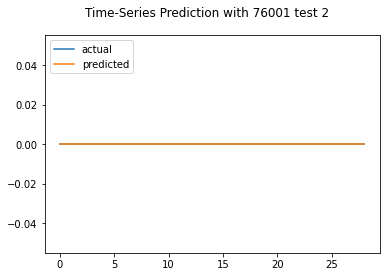

auc : average=1.000, std=0.000
acc : average=1.000, std=0.000
f1_score : average=0.331, std=0.469
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Ibagué-----------------------------------------------
##############################################################################################

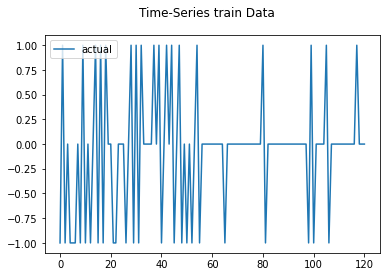

Restoring model weights from the end of the best epoch.
Epoch 00042: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00083: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00048: early stopping
Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_96_input (InputLayer)      [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_98_input (InputLayer)      [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_48 (Sequential)      (None, 3)            15361213    lstm_96_input[0][0]              
_____________________________________

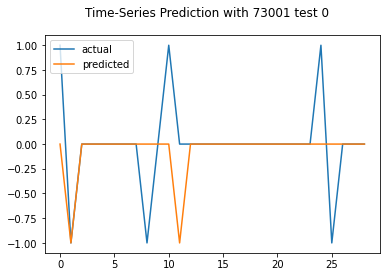

Restoring model weights from the end of the best epoch.
Epoch 00049: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00078: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00030: early stopping
Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_100_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_102_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_50 (Sequential)      (None, 3)            15361213    lstm_100_input[0][0]             
_____________________________________

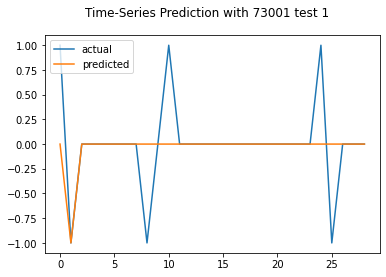

Restoring model weights from the end of the best epoch.
Epoch 00071: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00065: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_26"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_104_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_106_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_52 (Sequential)      (None, 3)            15361213    lstm_104_input[0][0]             
_____________________________________

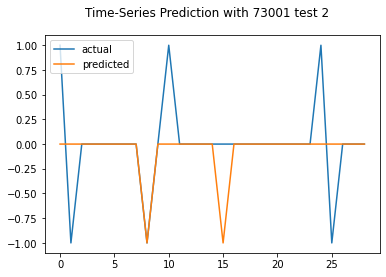

auc : average=0.903, std=0.005
acc : average=0.805, std=0.016
f1_score : average=0.391, std=0.383
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Itagüí-----------------------------------------------
##############################################################################################

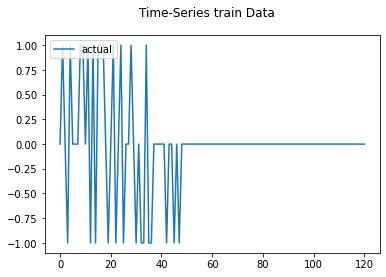

Restoring model weights from the end of the best epoch.
Epoch 00066: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00038: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Model: "model_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_108_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_110_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_54 (Sequential)      (None, 3)            15361213    lstm_108_input[0][0]             
_____________________________________

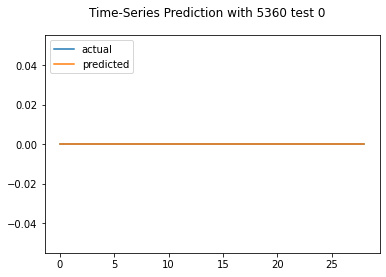

Restoring model weights from the end of the best epoch.
Epoch 00086: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00050: early stopping
Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_112_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_114_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_56 (Sequential)      (None, 3)            15361213    lstm_112_input[0][0]             
_____________________________________

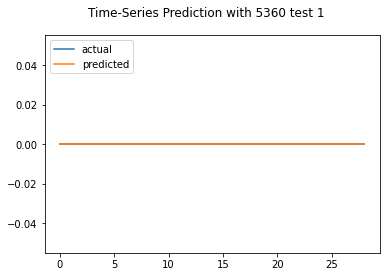

Restoring model weights from the end of the best epoch.
Epoch 00077: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00056: early stopping
Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
lstm_116_input (InputLayer)     [(None, 3, 2049)]    0                                            
__________________________________________________________________________________________________
lstm_118_input (InputLayer)     [(None, 3, 1)]       0                                            
__________________________________________________________________________________________________
sequential_58 (Sequential)      (None, 3)            15361213    lstm_116_input[0][0]             
_____________________________________

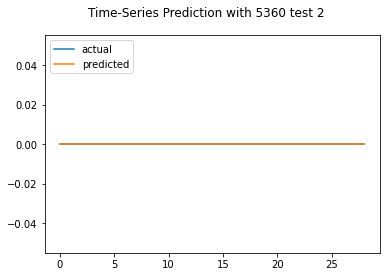

auc : average=1.000, std=0.000
acc : average=1.000, std=0.000
f1_score : average=0.333, std=0.471
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################


In [6]:
results = run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=None, epochs=100, batch_size=16, n_tests=3, plot_samples=True, classification=True, fusion='late')

In [7]:
results

{54001: {'rmse': [0.5428061683972677, 0.11770000445217485],
  'mape': [0.40229884286721546, 0.11378729594196375],
  'smape': [0.07235142, 0.20464072]},
 41001: {'rmse': [0.741280217965444, 0.005693894718177659],
  'mape': [0.6551724076271057, 0.0],
  'smape': [0.2638889, 0.37319526]},
 5001: {'rmse': [0.9398533304532369, 0.018430970651570535],
  'mape': [0.8965517282485962, 0.0],
  'smape': [0.3151515, 0.44569156]},
 50001: {'rmse': [0.5461751818656921, 0.0065906740076602435],
  'mape': [0.4137931168079376, 0.0],
  'smape': [0.0, 0.0]},
 68001: {'rmse': [0.7824019193649292, 0.03170860438869141],
  'mape': [0.6321839094161987, 0.032510645948454285],
  'smape': [0.25, 0.35518646]},
 8001: {'rmse': [0.5197185973326365, 0.02643412584362669],
  'mape': [0.3333333333333333, 0.058609427758146815],
  'smape': [0.0, 0.0]},
 23001: {'rmse': [0.4851367771625519, 0.03523399942007841],
  'mape': [0.3333333333333333, 0.058609427758146815],
  'smape': [0.0, 0.0]},
 76001: {'rmse': [1.0, 0.0],
  'mape